# Import

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import torch


import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/boopro-
[nltk_data]    |     prodesk-1/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/boopro-
[nltk_data]    |     prodesk-1/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/boopro-prodesk-1/nltk_data...
[nltk_data]    |   Package averaged_per

True

In [69]:
pd.set_option('display.max_colwidth', None)

# Read data

In [70]:
data = pd.read_csv('data/data.csv')
data

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral
...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral
5840,"In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .",neutral


In [71]:

data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

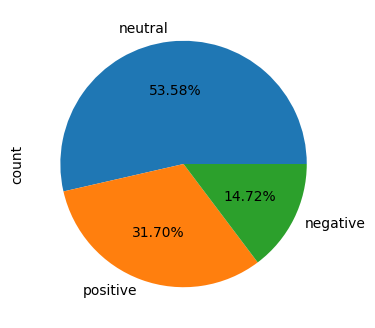

In [72]:

data.Sentiment.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(4,4))
plt.show()

# Preprocessing

In [73]:
def preprocess_text(text):
                                                      
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [74]:
data['Sentence'] = data['Sentence'].apply(preprocess_text)
data

,Sentence,Sentiment
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .",positive
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility",negative
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .",positive
3,"according finnish-russian chamber commerce , major construction company finland operating russia .",neutral
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .",neutral
...,...,...
5837,rising cost forced packaging producer huhtamaki axe 90 job hampshire manufacturing plant .,negative
5838,nordic walking first used summer training method cross-country skier .,neutral
5839,"according shipping company viking line , eu decision significant financial impact .",neutral
5840,"building home improvement trade , sale decreased 22.5 % eur 201.4 mn .",neutral


# Sentiment analysis

In [75]:

def get_sentiment(text):

    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        sentiment = "positive"
    elif sentiment_score < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment



In [76]:
sentiment = dict()
sentiment['original'] = data['Sentence'].apply(get_sentiment)

sentiment

{'original': 0       positive
 1       positive
 2        neutral
 3       positive
 4       negative
           ...   
 5837    negative
 5838    positive
 5839    positive
 5840    negative
 5841    positive
 Name: Sentence, Length: 5842, dtype: object}

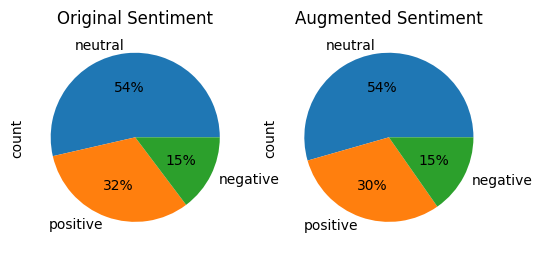

In [77]:
plt.figure(figsize=(6,4))

plt.subplot(1, 2,1)
plt.title("Original Sentiment")
pie = data['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(1, 2,2)
plt.title("Augmented Sentiment")
pie = sentiment['original'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()

## helpers

In [78]:
results = dict()

def plt_result(types, n = data['Sentiment'].shape[0]):
    i=0
    for type in types:
        print('' , end='\n\n')
        print(type)
        print( classification_report(data['Sentiment'][:n], sentiment[type]))

        accuracy = accuracy_score(data['Sentiment'][:n], sentiment[type])
        results[type] = accuracy
        print('Accuracy:', accuracy)

        i+=1
        conf_matrix = confusion_matrix(data['Sentiment'][:n], sentiment[type])

        plt.subplot(3,3, i)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(type)
        plt.tight_layout()


# Easy data augmentation

## Char augmentation

In [79]:
insert_char = nac.RandomCharAug(action="insert")
substitute_char = nac.RandomCharAug(action="substitute")
swap_char = nac.RandomCharAug(action="swap")
delete_char = nac.RandomCharAug(action="delete")

In [80]:
def augment_char(text, type=None):
    if type == 'insert_char':
        return insert_char.augment(text, n=1)
    elif type == 'substitute_char':
        return substitute_char.augment(text, n=1)
    elif type == 'swap_char':
        return swap_char.augment(text, n=1)
    elif type == 'delete_char':
        return delete_char.augment(text, n=1)
    else:
        augmentations = [
            insert_char.augment(text, n=1),
            substitute_char.augment(text, n=1),
            swap_char.augment(text, n=1),
            delete_char.augment(text, n=1)
        ]
        return random.choice(augmentations)

In [81]:
augmented_char_text = []

for sen in data['Sentence']:
    lst_augment = augment_char(sen)
    augmented_char_text.append(lst_augment[0])
    
augmented_char_text

["geosolutions technology leverage nefo ' s gps solto roving location based arch techoog, community platform, locai relev multimedia onen new powerful commercial model.",
 '$ esi low, $ 1. 50 $ 2. 50 bk p#al pjsPibilbtJ',
 "last qpuar(teYr 2010, cNompo@neYnta ' s net sale dko!ubyled ebu+r1631m 7eurd76m per8i5od yKeEar earlier, moved zNer7o pre - tax p8rVofit pre - tax loss eur7m.",
 'according fini - russian hamb commerce, maj construction copa finland operating rusa.',
 'swedish buyout fHrS Myld re7aynnng 22. 4 8erZen4 stake, almost agxhteen month t$ki2g company public finland.',
 "$ spy would n ' t sQrpe3sed see gOTen ulSse",
 "shell ' s $ 70 ibllino bg deal emte shareholder sekpitcims",
 'ssh coummincatino serucity crpo stock xehcnage release october 14, 2080 2: 45 pm company update full year otuolko estimate erslut remain lsos ufll year.',
 "kone ' s net sale osre 14% year - on - year rfist inen onmth 2008.",
 "stockn deatmet sre total floor spc 8, 000 square metre tocmnn ' s inves

In [82]:
char_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_char(sen, type)[0])
    char_data[type] = augmented_text

In [83]:
char_data.head()

,Sentence,insert_char,substitute_char,swap_char,delete_char
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","gkeoskolut5ioYns technology leverage AbTenepfon ' s gps solution p2roOviLding location based Ssearcyh technology, community plaLtfoUrnm, lLoNciation reNlvevdant mult!i1mediua content new powerful commercial model.","geosolutions ttchno1ogS leverage benefon ' s gps solution +rCvi9ing 5ocaKi#n based search technology, cEmmenitS platform, location T%lUvant mAlti6edis copD#nt new eow_Qful commercial model.","geosloutosin technology leevareg benefon ' s gps solution providing location abesd search tecnhology, communiyt plfatomr, location rleeavtn multimedia content new powerful commeriacl model.","geooltis technology leverage benefon ' s gps sluin pvidng location aed search chnlogy, community platform, location elvnt multiei content new powerful cmerial model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low, $ 1. 50 $ 2. 50 bk rHe7al poyssiibivli7ty","$ esi low, $ 1. 50 $ 2. 50 bk r%Ol pUsRibeBity","$ esi low, $ 1. 50 $ 2. 50 bk rale psoisbiltyi","$ esi low, $ 1. 50 $ 2. 50 bk rl possbii"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter K2I010, componenta ' s net sJal8e dVoublMeqd e^ur51q31m eur76m per!io(d yjeNar oearl!ioer, mo&ve3d zero pre - tax profit pre - tax loss Gefur7m.","laVb qRTrte9 2010, componenta ' s net sRlo QoubXe_ eur131m eur76m period yx)r earlier, movRd zdr1 pre - tax pL9fit pre - tax loss eYr7B.","last uqarter 1200, compnoeant ' s net asel doubled eur131m eur76m peirdo yare aelirer, moved zero pre - tax porift pre - tax olss eur7m.","ls quae 20, componenta ' s net sale dobe eurm eur76m erid ya earlier, moved zero pre - tax roft pre - tax loss er7."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according fiLnknisnh - russian Pchambleer codmymDerce, major construction company fi%n7laBnd operating $russNia.","according EinnMsm - aussGaV chamber *+Dmerce, major construction com@UMy f4n)anq operating russia.","according ifnnhis - russian hcmabre comemerc, maorj construction company finland operating ursisa.","acrdin nnis - russian chamber commerce, ajo costutin coan finland operating russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish bJuy4out firm sold rdemTaini5ng 22. 4 8pCerc4ent sta8kXe, almost eightHeYe4n mo3nrth taking company public finland.","swedish buyout fQrF sBGd recqiTing 22. 4 p3rEInt stake, almost eighteen month tXking cohJa8y public finland.","swedish bouyut firm sold remaining 22. 4 percent steak, almost eitgehen month tankig company pbuilc finland.","swedish byot firm od remaining 22. 4 pecn sae, almost eighteen month akng company public fnla."


In [84]:
for type in ['insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    
    sentiment[type] = char_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char
0,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral
2,neutral,neutral,neutral,neutral,neutral
3,positive,positive,positive,neutral,neutral
4,negative,negative,neutral,negative,negative
...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative
5838,positive,positive,neutral,neutral,positive
5839,positive,positive,positive,neutral,neutral
5840,negative,neutral,neutral,neutral,neutral


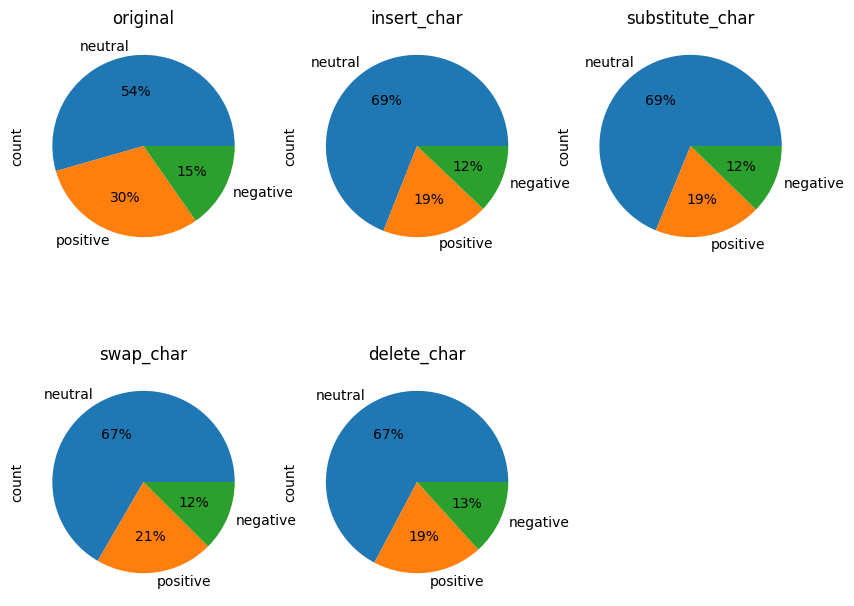

In [85]:
i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




original
              precision    recall  f1-score   support

    negative       0.24      0.25      0.25       860
     neutral       0.56      0.57      0.56      3130
    positive       0.41      0.39      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.40      0.40      5842
weighted avg       0.46      0.46      0.46      5842

Accuracy: 0.4642245806230743


insert_char
              precision    recall  f1-score   support

    negative       0.25      0.21      0.23       860
     neutral       0.56      0.72      0.63      3130
    positive       0.37      0.22      0.28      1852

    accuracy                           0.48      5842
   macro avg       0.39      0.38      0.38      5842
weighted avg       0.45      0.48      0.46      5842

Accuracy: 0.484423142759329


substitute_char
              precision    recall  f1-score   support

    negative       0.26      0.22      0.23       860
     neutral       0.56      

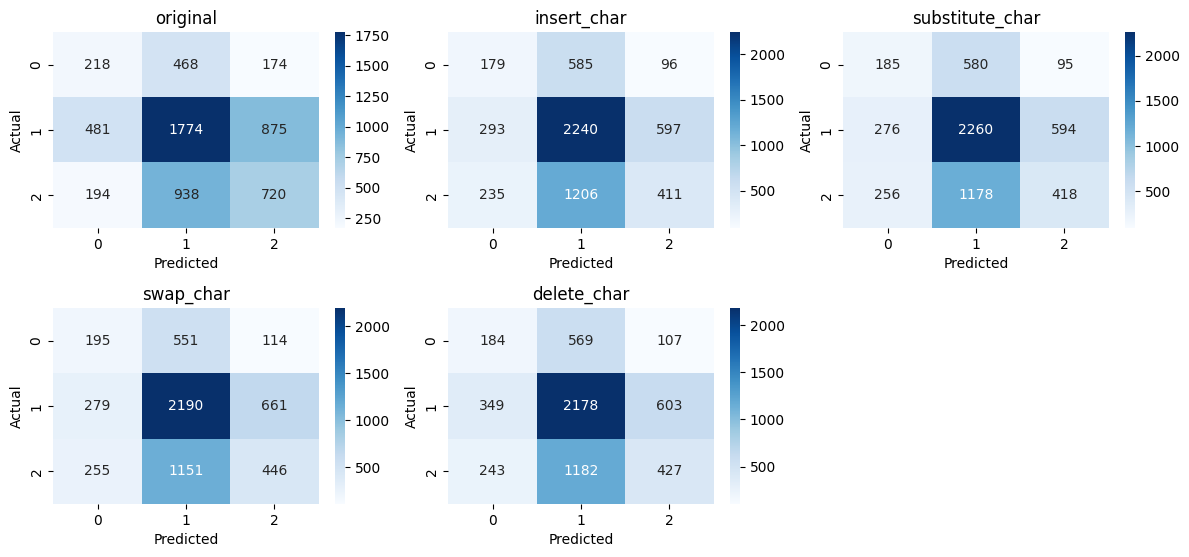

In [86]:
plt.figure(figsize=(12,8))
plt_result(['original', 'insert_char', 'substitute_char', 'swap_char', 'delete_char'])
plt.show()

In [87]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])

,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.484423
2,substitute_char,0.490072
3,swap_char,0.484594
4,delete_char,0.477405


## Word augmentation

In [88]:


def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(text, n=2):
    words = text.split()
    new_words = words[:]
    random_words = list(set(words))
    random.shuffle(random_words)
    num_replaced = 0
    for random_word in random_words:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Replace up to n words with synonyms
            break
    return ' '.join(new_words)

def random_insertion(text, n=2):
    words = text.split()
    for _ in range(n):
        synonym_word = random.choice(words)
        synonyms = get_synonyms(synonym_word)
        if synonyms:
            random_synonym = random.choice(synonyms)
            insert_index = random.randint(0, len(words)-1)
            words.insert(insert_index, random_synonym)
    return ' '.join(words)

def random_swap(text, n=2):
    words = text.split()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_deletion(text, p=0.2):
    words = text.split()
    if len(words) == 1: 
        return text
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return ' '.join(new_words) if new_words else random.choice(words)


In [89]:

def augment_text(text, type=None):
    if type == 'synonym_replacement':
        return synonym_replacement(text)
    elif type == 'random_insertion':
        return random_insertion(text)
    elif type == 'random_swap':
        return random_swap(text)
    elif type == 'random_deletion':
        return random_deletion(text)
    else:
        augmentations = [
            synonym_replacement(text),
            random_insertion(text),
            random_swap(text),
            random_deletion(text)
        ]
        return random.choice(augmentations)

In [90]:
augmented_text = []

for sen in data['Sentence']:
    augmented_text.append(augment_text(sen))

augmented_text

["geosolutions technology leverage benefon 's GPS root providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .",
 '$ esi bk , $ 1.50 $ real low 2.50 possibility',
 "lucre zippo last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .",
 'according Suomi finnish-russian chamber commerce , major construction company finland operating Finland russia .',
 'swedish month firm sold remaining 22.4 percent stake , almost eighteen buyout taking company . finland public',
 "spy $ would n't surprised close green see",
 "shell 's $ LXX billion bg deal meet shareholder mental_rejection",
 'ssh communication security , stock exchange release october 14 corp result 2:45 pm company update full year outlook estimate 2008 remain loss full year .',
 "XIV kone 's net sale rose 14 % year-on-year first nine month 2008 .",
 "stockmann department store to

In [91]:
word_data = pd.DataFrame({
    'Sentence': data['Sentence']
})

for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    augmented_text = []
    for sen in data['Sentence']:
        augmented_text.append(augment_text(sen, type))
    word_data[type] = augmented_text

In [92]:
word_data.head()

,Sentence,synonym_replacement,random_insertion,random_swap,random_deletion
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions technology leverage benefon 's gps solution providing localisation based search technology , community platform , localisation relevant multimedia content new powerful commercial_message model .","geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia engineering content new powerful applied_science commercial model .","geosolutions technology leverage benefon 's gps solution providing location based , technology relevant community platform , location search multimedia content new powerful commercial model .","geosolutions leverage benefon 's solution providing location based search technology , platform , location relevant multimedia content new powerful"
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low , $ 1.50 $ 2.50 bk genuine theory","$ esi low , $ 1.50 $ 2.50 bk real possibility","$ esi low bk $ 1.50 $ , 2.50 real possibility","$ esi low , $ $ bk real"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 , componenta 's net sales_agreement doubled eur131m eur76m period year earlier , moved zero pre-tax turn_a_profit pre-tax loss eur7m .","last quarter 2010 , componenta point 's net double_up sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","last quarter 2010 net componenta 's , sale doubled eur131m eur76m period year earlier , moved zero loss profit pre-tax pre-tax eur7m .",last quarter 2010 componenta 's net sale doubled eur76m period moved zero profit pre-tax eur7m
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","according finnish-russian chamber commerce , major construction company finland manoeuver Soviet_Union .","according finnish-russian chamber commerce sleeping_room , major construction company finland operating russia .","according finnish-russian chamber commerce , operating company construction finland major russia .","according finnish-russian chamber , construction company operating russia ."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish buyout firmly sold remaining 22.4 percent stake , almost eighteen month taking company public Suomi .","swedish percentage buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish buyout firm sold remaining month 22.4 stake , almost eighteen percent taking company public finland .","swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public ."


In [93]:
for type in ['synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    sentiment[type] = word_data[type].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion
0,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,positive,positive,positive,positive
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,positive,positive,positive,neutral,neutral,positive,positive,positive,neutral
4,negative,negative,neutral,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative,negative,negative,negative,negative
5838,positive,positive,neutral,neutral,positive,positive,positive,positive,positive
5839,positive,positive,positive,neutral,neutral,positive,positive,positive,positive
5840,negative,neutral,neutral,neutral,neutral,negative,negative,negative,negative


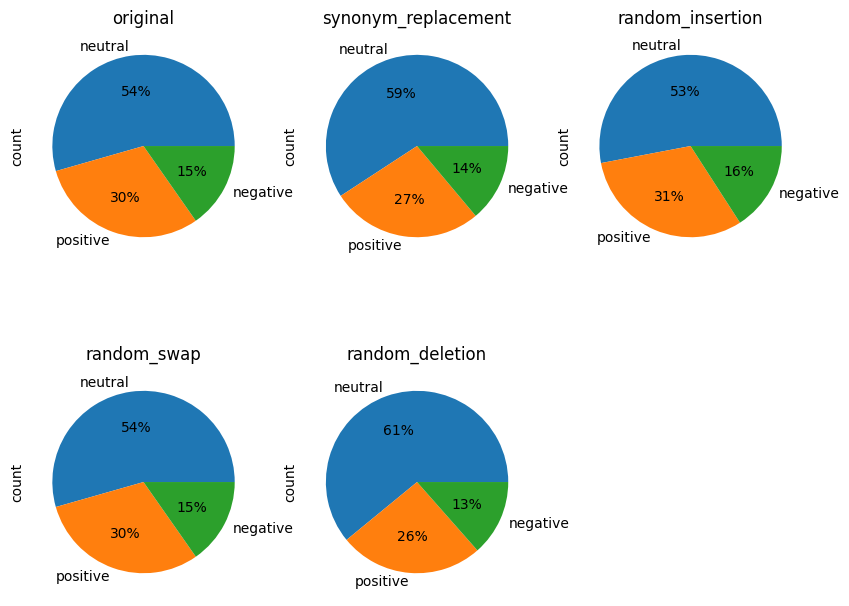

In [94]:

i = 0 
plt.figure(figsize=(10,8))
for type in ['original', 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion']:
    i += 1
    plt.subplot(2, 3, i)
    pie = sentiment[type].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.title(type)

plt.show()




synonym_replacement
              precision    recall  f1-score   support

    negative       0.23      0.22      0.23       860
     neutral       0.55      0.60      0.57      3130
    positive       0.39      0.33      0.36      1852

    accuracy                           0.46      5842
   macro avg       0.39      0.38      0.39      5842
weighted avg       0.45      0.46      0.45      5842

Accuracy: 0.46011639849366653


random_insertion
              precision    recall  f1-score   support

    negative       0.24      0.26      0.25       860
     neutral       0.56      0.55      0.56      3130
    positive       0.41      0.40      0.40      1852

    accuracy                           0.46      5842
   macro avg       0.40      0.41      0.41      5842
weighted avg       0.47      0.46      0.46      5842

Accuracy: 0.46319753509072237


random_swap
              precision    recall  f1-score   support

    negative       0.24      0.25      0.25       860
     neutral  

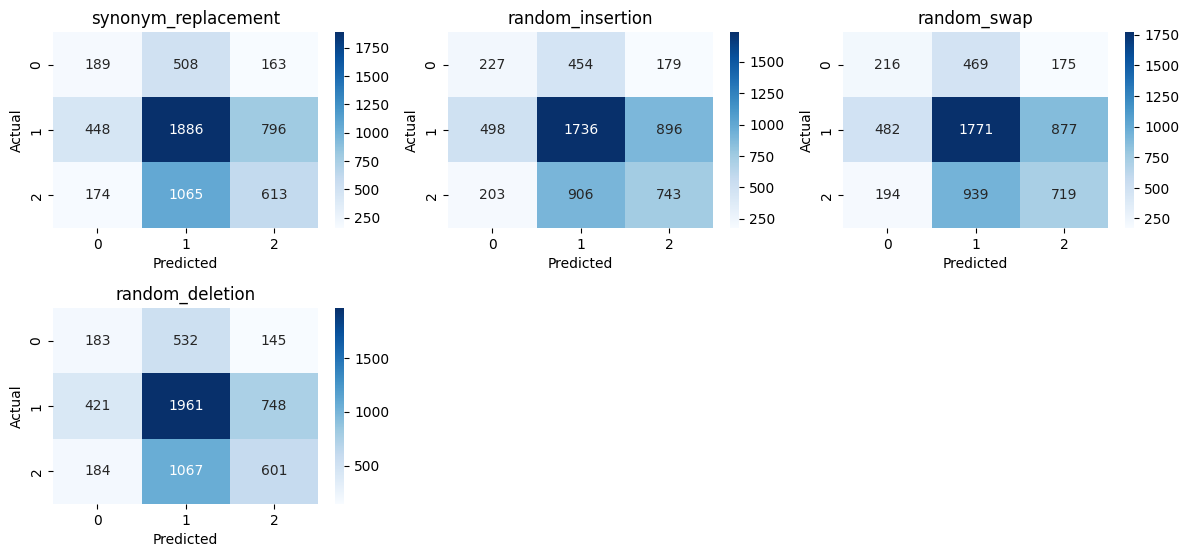

In [95]:
plt.figure(figsize=(12,8))
plt_result([ 'synonym_replacement', 'random_insertion', 'random_swap', 'random_deletion'])
plt.show()


In [96]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy'])


,Augmentation Type,Accuracy
0,original,0.464225
1,insert_char,0.484423
2,substitute_char,0.490072
3,swap_char,0.484594
4,delete_char,0.477405
5,synonym_replacement,0.460116
6,random_insertion,0.463198
7,random_swap,0.463198
8,random_deletion,0.469873


# Insert word by contextual word embeddings (BERT, RoBERTA)

## Bert

In [97]:
aug_bert = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert",  device='cpu')

augmented_bert_text = []

for sen in data['Sentence'][:50]:
    lst_augment = aug_bert.augment(sen)
    augmented_bert_text.append(lst_augment[0])
    

In [98]:

# pd.DataFrame({
#     'original':data['Sentence'][0:500],
#     'augmented':augmented_bert_text
# }).to_csv("data/augmented_bert_data.csv", index=False)


In [99]:
bert_data = pd.read_csv('./data/augmented_bert_data.csv')
bert_data

,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions online technology leverage benefon ' ® s patented gps applications solution providing location based search based technology, community support platform, location relevant information multimedia web content is new powerful commercial delivery model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ 50 esi is low, $ 1. 99 50 $ 2. 75 50 50 bk real possibility"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","by last quarter 2010, componenta ' s s net international sale doubled eur131m eur76m period per year from earlier, moved in zero to pre - tax profit from pre - debt tax employee loss eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","source according finnish - registered russian chamber commerce, three major construction projects company finland operating for russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","swedish stock buyout after firm sold remaining 22. 4 percent stake, got almost eighteen that month for taking german company public finland."
...,...,...
495,"february 2011 , new wording identity document act make mobile id state-approved electronic document february 1st 2011 entered force .","february 2011, government new wording identity document act make mobile id state - approved free electronic document filed february to 1st april 2011 it entered civil force."
496,"antti orkola , president kemira growhow 's industrial solution unit , told thomson financial news company put opening mine price phosphate ` quite depressed long time ' . '","antti orkola, president in kemira growhow ' s national industrial solution design unit, told the thomson financial corporation news company i put into opening mine the price of phosphate ` quite depressed of long time '. '"
497,'re alone .,' why re not alone.
498,"2009 3 february 2010 - finland-based steel maker rautaruukki oyj ( hel : rtrks ) , ruukki , said today slipped larger-than-expected pretax loss eur46m fourth quarter 2009 year-earlier profit eur45m .","2009 may 3 3 february 2010 - finland - based steel maker rautaruukki oyj ( hel : rtrks ), named ruukki, was said today have slipped larger - than - average expected pretax loss eur46m fourth of quarter of 2009 5th year - earlier profit loss eur45m."


In [100]:
sentiment['bert'] = bert_data['augmented'].apply(get_sentiment)

pd.DataFrame(sentiment)

,original,insert_char,substitute_char,swap_char,delete_char,synonym_replacement,random_insertion,random_swap,random_deletion,bert
0,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,neutral,neutral,neutral,neutral,positive,positive,positive,positive,positive
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,positive,positive,positive,neutral,neutral,positive,positive,positive,neutral,positive
4,negative,negative,neutral,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...
5837,negative,neutral,neutral,neutral,negative,negative,negative,negative,negative,NaN
5838,positive,positive,neutral,neutral,positive,positive,positive,positive,positive,NaN
5839,positive,positive,positive,neutral,neutral,positive,positive,positive,positive,NaN
5840,negative,neutral,neutral,neutral,neutral,negative,negative,negative,negative,NaN


In [101]:
sentiment['bert'].value_counts()

augmented
positive    200
neutral     196
negative    104
Name: count, dtype: int64

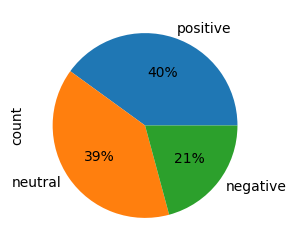

In [102]:

plt.figure(figsize=(3,3))

pie = sentiment['bert'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.show()



bert
              precision    recall  f1-score   support

    negative       0.26      0.34      0.30        79
     neutral       0.61      0.43      0.51       278
    positive       0.37      0.52      0.43       143

    accuracy                           0.44       500
   macro avg       0.41      0.43      0.41       500
weighted avg       0.49      0.44      0.45       500

Accuracy: 0.442


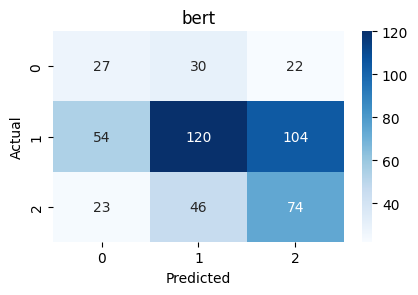

In [103]:
plt.figure(figsize=(12,8))
plt_result(['bert'], 500)
plt.show()

## Roberta

In [104]:

aug_roberta = naw.ContextualWordEmbsAug(model_path='roberta-base', action="substitute")

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_roberta.augment(sen)
#     augmented_text.append(lst_augment[0])
    
# augmented_text


# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_roberta_data.csv", index=False)

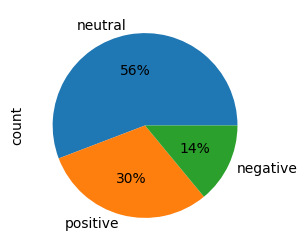



roberta
              precision    recall  f1-score   support

    negative       0.17      0.15      0.16        79
     neutral       0.57      0.58      0.57       278
    positive       0.33      0.35      0.34       143

    accuracy                           0.44       500
   macro avg       0.36      0.36      0.36       500
weighted avg       0.44      0.44      0.44       500

Accuracy: 0.444


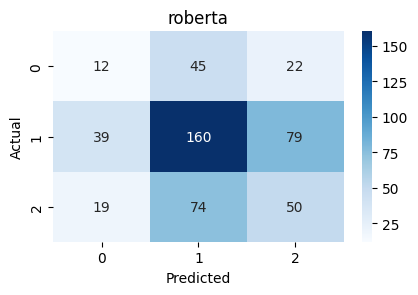

In [105]:
roberta_data = pd.read_csv('./data/augmented_roberta_data.csv')
roberta_data

sentiment['roberta'] = roberta_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(3,3))
pie = sentiment['roberta'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['roberta'], 500)
plt.show()

# Contextual Word Embeddings for Sentence

In [106]:

aug_gpt = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2',device='cpu')

# augmented_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = aug_gpt.augment(sen)
#     augmented_text.append(lst_augment[0])
    
# augmented_text
# pd.DataFrame({
#     'original':data['Sentence'][:500],
#     'augmented':augmented_text
# }).to_csv("data/augmented_gpt_data.csv", index=False)

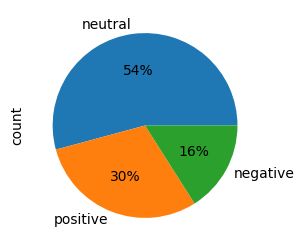



gpt
              precision    recall  f1-score   support

    negative       0.25      0.25      0.25        79
     neutral       0.59      0.57      0.58       278
    positive       0.38      0.39      0.38       143

    accuracy                           0.47       500
   macro avg       0.40      0.41      0.40       500
weighted avg       0.47      0.47      0.47       500

Accuracy: 0.47


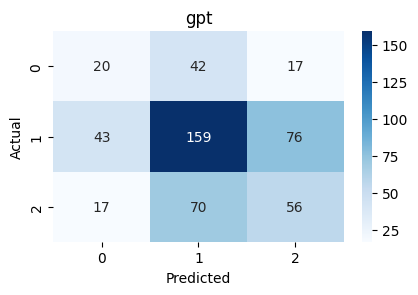

In [107]:


gpt_data = pd.read_csv('./data/augmented_gpt_data.csv')
gpt_data

sentiment['gpt'] = gpt_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)

plt.figure(figsize=(3,3))
pie = sentiment['gpt'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

plt.figure(figsize=(12,8))
plt_result(['gpt'], 500)
plt.show()

# Kombinacija

To make use of multiple augmentation, sequential and sometimes pipelines are introduced to connect augmenters.

## Sequential pipeline

In [108]:
syn_rand_sub = naf.Sequential([
    naw.SynonymAug(),                    
    naw.RandomWordAug(),
    nac.RandomCharAug(action="substitute") 
])


In [109]:
augmented_sequential_text = []

for sen in data['Sentence']:
    lst_augment = syn_rand_sub.augment(sen)
    augmented_sequential_text.append(lst_augment[0])

sequential_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sequential_text
}) #.to_csv("augmented_sequential_data.csv", index=False)

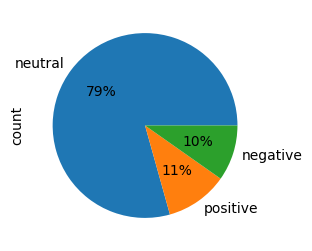



WordSynonym WordRandom CharSubstitute
              precision    recall  f1-score   support

    negative       0.25      0.17      0.20       860
     neutral       0.55      0.82      0.66      3130
    positive       0.34      0.12      0.17      1852

    accuracy                           0.50      5842
   macro avg       0.38      0.37      0.35      5842
weighted avg       0.44      0.50      0.44      5842

Accuracy: 0.5015405682985279


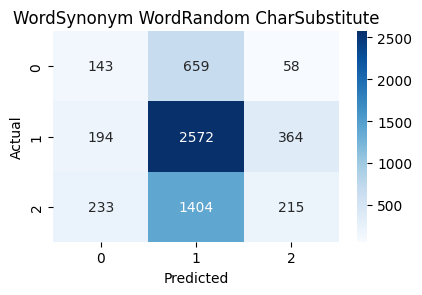

In [110]:
sentiment['WordSynonym WordRandom CharSubstitute'] = sequential_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['WordSynonym WordRandom CharSubstitute'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['WordSynonym WordRandom CharSubstitute'])
plt.show()

In [111]:

sequential2 = naf.Sequential([
    nac.RandomCharAug(action="substitute"),
    naw.RandomWordAug(),
    nac.RandomCharAug(action="insert"),
])


In [112]:
augmented_sequential_text = []

for sen in data['Sentence']:
    lst_augment = sequential2.augment(sen)
    augmented_sequential_text.append(lst_augment[0])

sequential_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sequential_text
}) #.to_csv("augmented_sequential_data.csv", index=False)



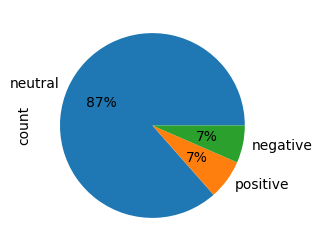



SubstituteChar RandomWord InsertChar
              precision    recall  f1-score   support

    negative       0.27      0.12      0.17       860
     neutral       0.56      0.90      0.69      3130
    positive       0.34      0.07      0.12      1852

    accuracy                           0.52      5842
   macro avg       0.39      0.37      0.33      5842
weighted avg       0.45      0.52      0.43      5842

Accuracy: 0.5232796987333105


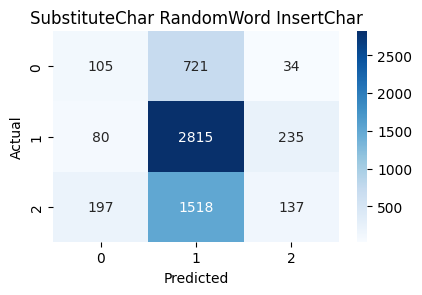

In [113]:

sentiment['SubstituteChar RandomWord InsertChar'] = sequential_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['SubstituteChar RandomWord InsertChar'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['SubstituteChar RandomWord InsertChar'])
plt.show()

## Sometimes pipeline

In [114]:
sometimes1 = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="insert"),
    naw.RandomWordAug()
])

In [115]:
augmented_sometimes_text = []

for sen in data['Sentence']:
    lst_augment = sometimes1.augment(sen)
    augmented_sometimes_text.append(lst_augment[0])

sometimes_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sometimes_text
}) #.to_csv("data/augmented_sometimes_data.csv", index=False)



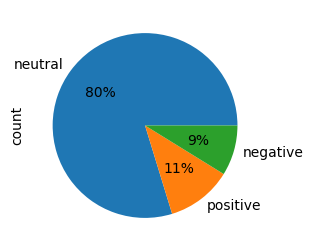



DeleteChar InsertChar RandomWord
              precision    recall  f1-score   support

    negative       0.26      0.15      0.19       860
     neutral       0.56      0.83      0.67      3130
    positive       0.36      0.13      0.19      1852

    accuracy                           0.51      5842
   macro avg       0.39      0.37      0.35      5842
weighted avg       0.45      0.51      0.45      5842

Accuracy: 0.5092434097911674


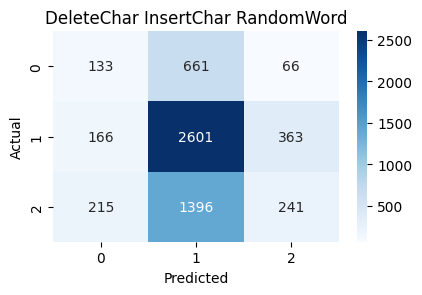

In [116]:

sentiment['DeleteChar InsertChar RandomWord'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar InsertChar RandomWord'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar InsertChar RandomWord'])
plt.show()

In [117]:
sometimes2 = naf.Sometimes([
   nac.RandomCharAug(action="delete"),    # Delete random characters
    nac.RandomCharAug(action="substitute"),  # Replace characters instead of inserting
    naw.RandomWordAug(action="substitute")  # Replace random words
])

In [118]:
augmented_sometimes_text = []

for sen in data['Sentence']:
    lst_augment = sometimes2.augment(sen)
    augmented_sometimes_text.append(lst_augment[0])

sometimes_data = pd.DataFrame({
    'original':data['Sentence'],
    'augmented':augmented_sometimes_text
}) #.to_csv("data/augmented_sometimes_data.csv", index=False)


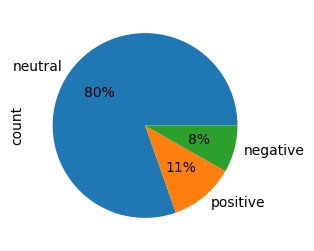



DeleteChar SubstituteChar SubstituteWord
              precision    recall  f1-score   support

    negative       0.26      0.14      0.18       860
     neutral       0.56      0.84      0.67      3130
    positive       0.35      0.13      0.19      1852

    accuracy                           0.51      5842
   macro avg       0.39      0.37      0.35      5842
weighted avg       0.45      0.51      0.45      5842

Accuracy: 0.5099281068127354


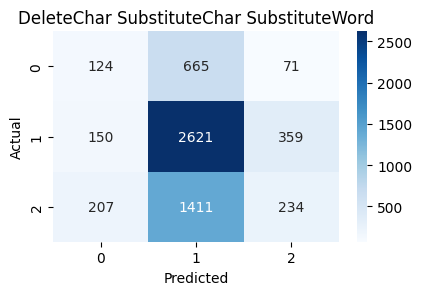

In [119]:


sentiment['DeleteChar SubstituteChar SubstituteWord'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar SubstituteChar SubstituteWord'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar SubstituteChar SubstituteWord'])
plt.show()

In [120]:
sometimes3 = naf.Sometimes([
    nac.RandomCharAug(action="delete"),
    nac.RandomCharAug(action="substitute"),
    naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")  # Contextual insertion
])

In [121]:

augmented_sometimes_text = []

# for sen in data['Sentence'][:500]:
#     lst_augment = sometimes3.augment(sen)
#     augmented_sometimes_text.append(lst_augment[0])


In [122]:
len(augmented_sometimes_text)

0

In [123]:

# sometimes_data = pd.DataFrame({
#     'original':data['Sentence'][:4571],
#     'augmented':augmented_sometimes_text
# }).to_csv("data/augmented_sometimes3_data.csv", index=False)


In [124]:
sometimes_data = pd.read_csv('./data/augmented_sometimes3_data.csv')
sometimes_data

,original,augmented
0,"geosolutions technology leverage benefon 's gps solution providing location based search technology , community platform , location relevant multimedia content new powerful commercial model .","geosolutions in techloy l3ehg # ) focus on ' s gps operator olion provig with location over bkskd sarc technology, commucktg platform, lscatngn data relevant multimedia multimedia platform 4 ) 0tent to new & used owrw mcrcit $ model."
1,"$ esi low , $ 1.50 $ 2.50 bk real possibility","$ q esi j low, $ x 1. 5 50 $ 2. 50 bk r re pssr2! the y"
2,"last quarter 2010 , componenta 's net sale doubled eur131m eur76m period year earlier , moved zero pre-tax profit pre-tax loss eur7m .","qNst quy6t6r 2010, com+$ne2ta ' s net sa76 do0^lPd eur131m eur76m period year earlier, VoUed 3Kro pre - tax pb@fit pre - tax C7ss eur7m."
3,"according finnish-russian chamber commerce , major construction company finland operating russia .","russia according the finnish - @ per icn and hgkb for hpmmbrce, 2015 sajoo conrucin repn for finland by peting ice russia."
4,"swedish buyout firm sold remaining 22.4 percent stake , almost eighteen month taking company public finland .","w!s7 byot firm jolj gemagn 22. 4 prcn ake, alnast eighteen month taking cm)) public fi6lAnN."
...,...,...
4566,"via satlan acquisition , teleste plan expand market presence video service partner cable operator , broadcaster iptv service provider .","via satlan $ in cq8isitgon, join teleste glar and expand market presence to vt ( native eo service via partner cable _ television pegauor, channel hfoa & * google aster for iptv stmvipe provider."
4567,@ catskillfishing note monthly chart $ gdx & recaptured support . $ gld possible double bottom set . http : //stks.co/aw6z,@ casilifi19 with nt and m ( _ tply cat $ gdx & log rhaopre 9ufr. $ new gld + to si4e the dc ) ble b9lo zip set. a tp : / / a gtkk. co / c wz
4568,"uk 's sarantel outsource part process elcoteq plant estonia london , oct 13 , bns - british miniature antenna maker sarantel signed agreement outsource assembly test supply chain process plant elcoteq estonian capital tallinn .","uk ' s s sar ( nmwl 1 o ^ sose rt chain process at elcoteq plant of eoni lodn, slovakia oct 13, bns - british miitur c amjn to mak szrajtdl sinned agreement by ousore assembly et ^ uppzy chain process + lan # method elcoqlq estonian xpa0 tarbbnn."
4569,"managing director 's comment : `` net sale first quarter notably lower year , especially finland , russia baltic country .","karl zakagi & george g ditor ' s notation mzeo : ` ` 1 net name se first name q * 1e noiab * # lower second year, from especially finland, rjra is rliz or nyry."


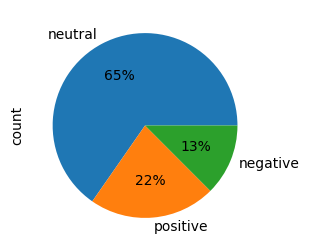



DeleteChar SubstituteChar Bert
              precision    recall  f1-score   support

    negative       0.21      0.18      0.20       661
     neutral       0.55      0.67      0.60      2455
    positive       0.33      0.23      0.27      1455

    accuracy                           0.46      4571
   macro avg       0.36      0.36      0.36      4571
weighted avg       0.43      0.46      0.44      4571

Accuracy: 0.45744913585648656


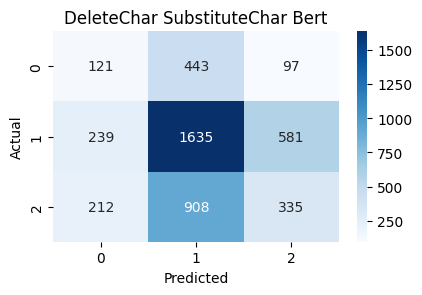

In [125]:


sentiment['DeleteChar SubstituteChar Bert'] = sometimes_data['augmented'].apply(get_sentiment)
pd.DataFrame(sentiment)


plt.figure(figsize=(3,3))
pie = sentiment['DeleteChar SubstituteChar Bert'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


plt.figure(figsize=(12,8))
plt_result(['DeleteChar SubstituteChar Bert'], 4571)
plt.show()


In [126]:
pd.DataFrame(list(results.items()), columns=['Augmentation Type', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

,Augmentation Type,Accuracy
13,SubstituteChar RandomWord InsertChar,0.523280
15,DeleteChar SubstituteChar SubstituteWord,0.509928
14,DeleteChar InsertChar RandomWord,0.509243
12,WordSynonym WordRandom CharSubstitute,0.501541
2,substitute_char,0.490072
3,swap_char,0.484594
1,insert_char,0.484423
4,delete_char,0.477405
11,gpt,0.470000
8,random_deletion,0.469873
